<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/master/2%20Advanced/050numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# numpyを使う Use numpy
Numpyは行列計算を含む、高度な数値計算を高速に行うライブラリで、これを使うと、行列計算の関数は自作する必要がまったくなくなります。(とはいえ、スキルを上げるためには、自分で書けたほうが良いです)
Pythonの実用的なライブラリ(画像処理、機械学習、統計など)のほとんどはnumpyをつかって作られています。もしnumpyがなかったなら、Pythonがここまで普及することもなかったと思います。

Numpy is a python library for fast calculation including the linear algebra.  With numpy, you do not need to program matrix and vector calculations by yourself any longer. (But you should better be able to program them by yourself for brush up your skills.) 

Most of Python's practical libraries (image processing, machine learning, statistics, etc.) are built using numpy. Without numpy, Python would not have become so popular.

### ベクトル Vector
numpyには、`array`と呼ばれる、リストに似たデータ形式があります。違うのは、`array`には同じ種類のデータしか入れられない点です。実際のところ、実数の`list`は簡単に`array`に変換できます。

There is a list-like data sequence type called `array` in numpy.  You can put the data of the same type (typically floating point numbers) in an array.  Indeed, a list can be converted to an array very easily.

In [ ]:
import numpy as np

L = [1.0,2.0,3.0]
vector = np.array(L)
vector

データが混在していると?

If data of different kinds exist?

In [ ]:
D = [1.0, 12, "A"]
vector2 = np.array(D)
vector2

全部文字列にされてしまいました。

They are converted to strings.

要素が0や1ばかりのarrayを作る便利な関数があります。

There are convenient functions to make arrays of zeros or ones.  

In [ ]:
zero = np.zeros(10)
one = np.ones(10)
zero,one

arrayの一部分をとりだす方法は、listと同じです。

You can pick up a part of the array in the same way as the list.

In [ ]:
vector[1],vector[1:3]

しかし、演算子を使う時に、大きな違いがあります。list同士を足し算すると、長いリストになるのに対し、array同士を足すと、ベクトルの加算を行ってくれます。

The biggest difference is that an array is actually a vector in mathematics. You can calculate them directly with algebraic operators without writing loops.

In [ ]:
L1 = [1.,2.,3.]
L2 = [4.,5.,6.]
print(L1+L2)

In [ ]:
v1 = np.array(L1)
v2 = np.array(L2)
print(v1+v2,v2-v1,v2/v1,v2*v1)

ベクトルに定数を掛けることも可能です。

Product of an array and a number becomes an array.

In [ ]:
v1*10

numpyにあらかじめ準備されている各種関数(ufunc)を使うと、arrayのすべての要素に一気に関数を作用させることができます。

Using the various functions (ufunc) prepared in numpy, it is possible to act on all elements of an array at once.

In [ ]:
np.sin(v1)

ちなみに、arrayの代わりに数値のリストを与えても問題ありません。

There is no problem giving a list of numbers instead of an array.

In [ ]:
np.sin(L1)

よくやる使い方は、等差数列を作るlinspaceやarangeとufuncを組みあわせて、グラフを描くという方法です。

A common usage is to draw a graph by combining `linspace` or `arange` and ufunc to create an isosceles sequence.



In [ ]:
# arange is a generator similar to range() but accepts floating numbers.
# arangeはrangeに似ていますが、範囲と間隔に実数が使えます。
?np.arange

In [ ]:
# Generates a sequence of isosceles numbers between 1 and 3 with 0.5 intervals.
# 1以上3未満で0.5間隔の等差数列を生成する。
np.arange(1.0, 3.0, 0.5)

In [ ]:
# linspace generates a sequence of the specified number of items.
?np.linspace

In [ ]:
# Generates a sequence of ten isosceles numbers between 1 and 10.
# 1から10の間で等間隔に10点とる。
np.linspace(1.0, 10.0, num=10)

In [ ]:
# x is a sequence of numbers
x = np.linspace(0, np.pi*10, 1000)
# apply the functions to each item of x
y = np.exp(-x/100)*np.sin(x)

import pylab

pylab.plot(x,y)

ベクトル同士のかけ算をすると、どうなるでしょうか。

How about multiplying two vectors together?

In [ ]:
v1*v2

要素同士がかけあわされたarrayになりました。この要素を足しあわせれば、2つのベクトルの内積(dot product)が得られます。

Elements of the vectors are multiplied individually. When you want the dot product (inner product) of the vectors, just sum them up.

In [ ]:
np.sum(v1*v2)

ですが、これだと一見して何を計算しようとしているのかわかりにくいので、dot関数を使いましょう。

Easier way to get a dot product is to use the `dot()` function.

In [ ]:
np.dot(v1,v2)

新しいpythonでは、dot積の演算子`@`が使えます。


A new operator `@` is useful in new Pythons.


In [ ]:
v1@v2

外積(cross product)はcross関数で計算できます。(外積って何だったか覚えていますか?)

It is also easy to calculate the cross product (outer product) of the vectors. (Do you remember the definition?)

In [ ]:
np.cross(v1,v2)

関数の意味や引数の使い方がわからなくなったら、関数名の前に?を付けてヘルプを表示できます。

If you are not sure what a function means or how to use its arguments, you can prefix the function name with ? in front of the function name to get help.

In [ ]:
?np.cross

たとえば、結晶の単位胞を構成する3つのベクトル$a,b,c$から、単位胞の体積を求めるには、$a\cdot (b\times c)$という計算を行います。これは、Pythonではこんな風に書きます。

For example, to find the volume of the unit cell from the three basic vectors $a,b,c$ that make up the unit cell of a crystal, the calculation $a\cdot (b\times c)$ is performed. This is how it is written in Python.

In [ ]:
a = np.array([1.0, 0.0, 0.0])
b = np.array([1.0, 1.0, 0.0])
c = np.array([1.0, 1.0, 1.0])
a @ np.cross(b,c)

あるいは、単にdeterminant(行列式)を計算します。

It is equivalent to the determinant of the matrix.

In [ ]:
np.linalg.det([a,b,c])

これで、ベクトルの基本的な計算はすべてできることがわかりました。

Thus you can calculate the vectors with numpy very easily.

ちなみに、文字列データからarrayを作る簡単な方法があります。三連ダブルクオーテーションは、改行を含む文字列を定義したい時に使います。

Here is an easy way to make a numpy array from a string.  Here the triple double-quotations `"""` is useful to define a long string with linefeeds.

In [ ]:
s = """
1  2
3   4
5    6
"""
v = np.fromstring(s, sep=" ")
v

`fromstring()`は改行も空白と同一視し、一列のarrayに変換してしまいます。
これを、3行2列の行列(後述)にしたい場合は、`reshape`関数を使います。`reshape`はその名の通り、1次元(あるいは多次元)のarrayの形を変形して多次元arrayにしてくれます。

The function `fromstring()` regards the linefeeds as a type of space character and convert the string into a one-dimensional array of floating point numbers.
If you want to make it as a (3,2) matrix, use `reshape` function.
`Reshape` changes the shape of the array.

In [ ]:
w=v.reshape((3,2))
w

`.shape`(これは関数ではありません)を次のように使うことで、その行列のshapeを知ることができます。このことからもわかるように、listとは違い、多次元のarrayでは、各行の長さはすべて等しくなければなりません。(listの場合は、`[[1,2],[3,4,5]]`のような長さの違う要素でも構いません。)

The following is the way to know the shape of an array.  As you see, the array must be rectangular, i.e., the lengths of the rows must be identical. (In the case of a list, on the other hand, you can make a list of lists of different length, e.g. `[[1,2],[3,4,5]]`.)

In [ ]:
w.shape

もうすこし、arrayの操作を練習してみましょう。

Let's practice the array operations further.

In [ ]:
v=np.array([1.,2.,3.,4.,5.])

1番目から3個の要素をとりだす方法はリストの場合と同じです。

Here is a way to pick up the three elements from element 1 (is the second element of the array).

In [ ]:
v[1:1+3]

:を使った記法では、v[start:end]のほかに、v[start:end:interval]という書き方があります。
startが0の場合には省略できます。endが最後の要素の場合にも省略できます。
例えば、0番目から最後の要素まで、1つとばしで選ぶ場合は、v[0:5:2]あるいはv[::2]と書きます。

There are two types of colon notations: `v[start:end]` and `v[start:end:interval]`.
You can omit the start value if it is zero. 
You can also omit the end value if it is the last one.
For example, v[0:5:2] or v[::2] picks up the every two elements starting from the element 0.

In [ ]:
v[::2]

v[:]はvの全要素という意味で、vと同じ意味になります。

v[:] is the same meaning as v.

In [ ]:
v[:]+10

In [ ]:
v+10

例えば、ベクトルの要素の順番を逆にするにはどうしたらいいでしょうか?
リストの場合には、そのための特別な命令reverse()がありますが、numpyではそんなものがなくても簡単に逆順にできます。

How to invert the order in an array?
There is a special function `reverse()` to invert a list, while it is "piece of cake" for an numpy array.

In [ ]:
v[::-1]

ほかにもいろんな書き方を試してみて下さい。

Let's try other notations.

In [ ]:
v[::-2]

In [ ]:
v[-1:-3:-1]

In [ ]:
v[1::2]

ひとつ気をつけないといけないことは、こうしたarrayの変形は、実際にはvを加工**しているわけではない**ことです。
例えば、巨大なarrayを変形するたびに、内容のコピーを作っていたのではコピーにかかる時間が馬鹿になりません。

次の例では、wに入るものは、vから要素を抜きだしたコピーではなく、vから要素を抜きだす「手順」です。

Note that these array modification operations do not actually modify the v itself for efficiency.

In the following example, w is not a copy of v but w shares the part of v.

In [ ]:
w=v[1::2]
w

wはvのコピーではないので、wの値を変えると、vの値が変わってしまいます。

The values in w is shared with v, so if you modify an element in w, it also change the corresponding element in v.

In [ ]:
w[0]=9
v

vに影響を与えないように要素を抜きだす場合には、コピーする必要があります。

To avoid the side-effect, you should copy it explicitly.

In [ ]:
w = v[1::2].copy()
w

In [ ]:
w[:]=8
v, w

### 行列 Matrix
次に行列に挑戦します。2次元のリストをarrayに変換すると、行列として扱われます。

Matrix is a 2D array in numpy.

In [ ]:
LX = [[1,2,3],
      [4,5,6],
      [7,8,9]]
LX

In [ ]:
NX = np.array(LX)
NX

0ベクトルと同じように、0行列も簡単に作れます。

To make a zero matrix, use zeros function again.

In [ ]:
np.zeros((3,3))

単位行列もよく使います。

Identity() function is also useful.

In [ ]:
np.identity(3)

行列(あるいは多次元のarray)の要素を指定する時は、リストの場合よりも直感的な表記ができます。

The notation to specify the part of a matrix is slightly different from that of a list.

In [ ]:
print(LX[1])
print(NX[1])
print(LX[1][1])
print(NX[1,1])

また、多次元arrayを切り出す場合には、":"(コロン)を使った独特の記法が使えます。おなじことを多次元リストに対してやろうとすると、forループを書かざるをえません。

You can crop a matrix by using ":" notation.  There is no correspondent way for a multidimensional list.

In [ ]:
print(NX[1:3,1:3])
print(NX[0:2,2])

同じことを多次元リストに対して行うと、とても直感的でないことが起こります。

If you use the similar notation for a multidimensional list, it works in a non-intuitive way.

In [ ]:
print(LX[1:3][1:3])

行列NXにベクトルを掛けてみます。

How about the product of a matrix and a vector?

In [ ]:
v = np.array([10,100,1000])
NX*v

これは妙な計算になってしまいました。では、dotなら?

It is a strange result. Then how about using the dot product?

In [ ]:
np.dot(NX,v)

In [ ]:
NX @ v

vと答の両方が縦ベクトルだと思えば、ちゃんと行列とベクトルのかけ算になっていることはわかると思います。

It seems correct so far.

では、行列のかけ算を試してみましょう。

Then how about the dot product of two matrices?

In [ ]:
A = np.array([[1,1],
              [2,2]])
B = np.array([[3,4],
              [3,4]])
print(A@B)
print(B@A)

ちゃんと順序通りのかけ算ができることがわかりました。

It works nicely.

行列を2乗すると?

How about the square of a matrix?

In [ ]:
A**2

だめでした。ベクトル同士を"\*"した時と同じように、要素ごとのかけ算になってしまいました。やはり、次のように書かないといけないようです。

Nope. The use of normal "\*" operator does not work as we expect.  So let's use the dot product again.

In [ ]:
np.dot(A,A)

In [ ]:
A@A

内積演算子`@`はかけ算に似ていますが、`A@A`を`A@@2`とは書けないみたいです。

The inner product operator `@` looks like multiplication, but it seems that `A@A` cannot be written as `A@@2`.



転置行列はtranspose関数か、または簡単に.Tで作れます。

Transposition of a matrix is easy.

In [ ]:
np.transpose(A)

In [ ]:
A.T

行列式、逆行列の計算も簡単です。numpyの拡張ライブラリlinalg(Linear Algorithm?)の中に、いろんな関数が準備されています。

Calculating determinants and inverses is also easy.

Various functions are available in linalg(Linear Algorithm?), an extension library of numpy.

In [ ]:
A = np.array([[1,1],[1,2]])
B = np.linalg.inv(A)
d = np.linalg.det(A)
print(B)
print(np.dot(A,B))
print(np.dot(B,A))
print(d)

行列計算で、あと面倒くさいものといえば、固有値計算ですが、これもnumpyに組みこまれてい
ます。

Another troublesome matrix calculation is the eigenvalue calculation, which is also incorporated in numpy. 

ある行列Aに対し、次のような関係を満たす数$a$とベクトル$\vec{v}$を、固有値と固有ベクトルと呼びます。

For a given matrix A, the numbers $a$ and vectors $\vec{v}$ that satisfy the following relationship are called eigenvalues and eigenvectors.

$$A\vec{v}=a\vec{v}$$

In [ ]:
A = np.array([[1,1],[1,2]])
np.linalg.eig(A)

eig関数は、2つの値を返すことがわかります。1つめのarrayは、2つの固有値を含んでいます。そして、2つめの2次元arrayには、対応する固有ベクトルが行列の形で含まれています。ただし、縦に入っているらしいので、個々のベクトルを取りだす時には一工夫必要です。

We see that the eig function returns two values: the first array contains two eigenvalues. The second two-dimensional array contains the corresponding eigenvectors in matrix form. Note that they are contained as columnar vectors.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(A)

# Transpose to extract the eigenvectors
eigenvectors= eigenvectors.T   
print(eigenvalues[0],eigenvectors[0])

# Check if the combination satisfies the given equation.
#上の関係式を満たすかどうか確認する。
print(eigenvalues[0]*eigenvectors[0], A @ eigenvectors[0])
print(eigenvalues[1]*eigenvectors[1], A @ eigenvectors[1])

数値計算では、通常のリストの代わりにnumpyのarrayを使うことをおすすめします。ベクトルや行列の計算が簡単にでき、プログラムがすっきりするというメリットの他に、計算が非常に高速になるというメリットもあります。

In [ ]:
R = np.arange(1,10)
R

2つのarrayをリストに入れて、2次元のarrayを作れます。

In [ ]:
A = np.array([R,R,R,R,R,R,R,R,R,])
A

みっともないので、リスト内包表記で書けば

Simpler way in list comprehension,

In [ ]:
A = np.array([R for i in range(9)])
A

Aを転置したものをBとします。

B is a transposition of A.

In [ ]:
B=A.T
B

かけ算`*`すると、各要素がかけあわされ、九九の表ができます。

Mupliplying them to make the times table.

In [ ]:
A*B

割り算の余りを計算する`%`演算子を使ってみます。

You can easily make its variation, a modulo table.

In [ ]:
A%B

リスト内包記法を使って256x256の巨大な2次元arrayを作り、これを画像として表示してみます。(`numpy array to image`で検索し、https://stackoverflow.com/questions/2659312/how-do-i-convert-a-numpy-array-to-and-display-an-image を参考にしました)

In [ ]:
#              O N E T W R F U I V S X G L
A = np.array([[1,1,1,0,0,0,0,0,0,0,0,0,0,0],   #ONE
              [1,0,0,1,1,0,0,0,0,0,0,0,0,0],   #TWO
              [0,0,2,1,0,1,0,0,0,0,0,0,0,0],   #THREE
              [1,0,0,0,0,1,1,1,0,0,0,0,0,0],   #FOUR
              [0,0,1,0,0,0,1,0,1,1,0,0,0,0],   #FIVE
              [0,0,0,0,0,0,0,0,1,0,1,1,0,0],   #SIX
              [0,1,2,0,0,0,0,0,0,1,1,0,0,0],   #SEVEN
              [0,0,1,1,0,0,0,0,1,0,0,0,1,0],   #EIGHT
              [0,2,1,0,0,0,0,0,1,0,0,0,0,0],   #NINE
              [0,1,1,1,0,0,0,0,0,0,0,0,0,0],   #TEN
              [0,1,3,0,0,0,0,0,0,1,0,0,0,1],   #ELEVEN
              [0,0,2,1,1,0,0,0,0,1,0,0,0,1],   #TWELVE
              [0,1,2,2,0,1,0,0,1,0,0,0,0,0],   #THIRTEEN
              [1,1,2,1,0,1,1,1,0,0,0,0,0,0]])  #FOURTEEN
V = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
print(np.linalg.det(A))

残念ながら、Aが特異行列らしく、逆行列が作れません。そこで、いろいろ試行錯誤した結果、#TWOの行を削り、代わりに#FIFTEENを追加すると、Aが特異行列でなくなることがわかりました。

Unfortunately, it causes an error because the matrix A is singular. We avoid the singularity by employing FIFTEEN in place of TWO.

### 例題 Exercise
次の覆面算を解いてみましょう。ただし、H=0とします。

Let's solve the following simultaneous equations.

* O+N+E = 1
* T+W+O = 2
* T+H+R+E+E = 3
* F+O+U+R = 4
* F+I+V+E = 5
* S+I+X = 6
* S+E+V+E+N = 7
* E+I+G+H+T = 8
* N+I+N+E = 9
* T+E+N = 10
* ....

これは、一見複雑に見えますが、たんなる連立方程式の求解です。全部まとめて解くのは難しいので、この中で同じ変数が適度にまず、でてくる変数を並べると、

It seems quite wierd, but it is just a normal simultaenous equation, so you can solve it with linear algebra. 

* 1.だけだと(O,N,E)
* 2までだと(O,N,E,T,W)
* 3までだと(O,N,E,T,W,R)
* 4までだと(ONETWRFU)
* 5までだと(ONETWRFUIV)
* 7までだと(ONETWRFUIVSX)
* 10までだと(ONETWRFUIVSXG)
* 14までだと(ONETWRFUIVSXGL)

で、14まで並べれば、変数の個数と方程式の個数が等しくなり、解けるかもしれないことがわかります。

連立方程式は、行列で書きあらわせます。

$$
\left(
    \begin{matrix}
        1&1&1&0&0&0&\cdots&0\\
        1&0&0&1&1&0&\cdots&0\\
        0&0&2&1&0&1&\cdots&0\\
        1&0&0&0&0&0&\cdots&0\\
        \vdots\\
    \end{matrix}
\right)
\left(
    \begin{matrix}
        O\\
        N\\
        E\\
        T\\
        W\\
        H\\
        \vdots\\
    \end{matrix}
\right)
=
\left(
    \begin{matrix}
        1\\
        2\\
        3\\
        4\\
        5\\
        6\\
        \vdots\\
    \end{matrix}
\right)
$$

連立方程式を解くことは、逆行列を求めることにほかなりません。

$$A\cdot x=b$$ $$x=A^{-1}\cdot b$$

In [ ]:
#              O N E T W R F U I V S X G L
A = np.array([[1,1,1,0,0,0,0,0,0,0,0,0,0,0],   #ONE
              [1,0,0,1,1,0,0,0,0,0,0,0,0,0],   #TWO
              [0,0,2,1,0,1,0,0,0,0,0,0,0,0],   #THREE
              [1,0,0,0,0,1,1,1,0,0,0,0,0,0],   #FOUR
              [0,0,1,0,0,0,1,0,1,1,0,0,0,0],   #FIVE
              [0,0,0,0,0,0,0,0,1,0,1,1,0,0],   #SIX
              [0,1,2,0,0,0,0,0,0,1,1,0,0,0],   #SEVEN
              [0,0,1,1,0,0,0,0,1,0,0,0,1,0],   #EIGHT
              [0,2,1,0,0,0,0,0,1,0,0,0,0,0],   #NINE
              [0,1,1,1,0,0,0,0,0,0,0,0,0,0],   #TEN
              [0,1,3,0,0,0,0,0,0,1,0,0,0,1],   #ELEVEN
              [0,0,2,1,1,0,0,0,0,1,0,0,0,1],   #TWELVE
              [0,1,2,2,0,1,0,0,1,0,0,0,0,0],   #THIRTEEN
              [1,1,2,1,0,1,1,1,0,0,0,0,0,0]])  #FOURTEEN
V = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
print(np.linalg.det(A))

残念ながら、Aが特異行列らしく、逆行列が作れません。そこで、いろいろ試行錯誤した結果、#TWOの行を削り、代わりに#FIFTEENを追加すると、Aが特異行列でなくなることがわかりました。

Unfortunately, it causes an error because the matrix A is singular. We avoid the singularity by employing FIFTEEN in place of TWO.

In [ ]:
#              O N E T W R F U I V S X G L
A = np.array([[1,1,1,0,0,0,0,0,0,0,0,0,0,0],   #ONE
           #  [1,0,0,1,1,0,0,0,0,0,0,0,0,0],   #TWO
              [0,0,2,1,0,1,0,0,0,0,0,0,0,0],   #THREE
              [1,0,0,0,0,1,1,1,0,0,0,0,0,0],   #FOUR
              [0,0,1,0,0,0,1,0,1,1,0,0,0,0],   #FIVE
              [0,0,0,0,0,0,0,0,1,0,1,1,0,0],   #SIX
              [0,1,2,0,0,0,0,0,0,1,1,0,0,0],   #SEVEN
              [0,0,1,1,0,0,0,0,1,0,0,0,1,0],   #EIGHT
              [0,2,1,0,0,0,0,0,1,0,0,0,0,0],   #NINE
              [0,1,1,1,0,0,0,0,0,0,0,0,0,0],   #TEN
              [0,1,3,0,0,0,0,0,0,1,0,0,0,1],   #ELEVEN
              [0,0,2,1,1,0,0,0,0,1,0,0,0,1],   #TWELVE
              [0,1,2,2,0,1,0,0,1,0,0,0,0,0],   #THIRTEEN
              [1,1,2,1,0,1,1,1,0,0,0,0,0,0],   #FOURTEEN
              [0,1,2,1,0,0,2,0,1,0,0,0,0,0]])  #FIFTEEN
numbers = np.array([1,3,4,5,6,7,8,9,10,11,12,13,14,15])

np.linalg.det(A)

逆行列を使うと、それぞれの記号の値が直ちに一意に求まります。(多少の誤差が生じるので、丸めました)

The answer is obtained by solving the linear equation. (Small errors are rounded.)

In [ ]:
O,N,E,T,W,R,F,U,I,V,S,X,G,L = np.round(np.linalg.inv(A) @ numbers, 6)
O,N,E,T,W,R,F,U,I,V,S,X,G,L

In [ ]:
H=0
print(O+N+E)
print(T+W+O)
print(T+H+R+E+E)
print(F+O+U+R)
print(F+I+V+E)
print(S+I+X)
print(S+E+V+E+N)
print(E+I+G+H+T)
print(N+I+N+E)
print(T+E+N)
Z=6
print(Z+E+R+O)


確かにO+N+E=1になることがわかります。また、計算では省いたT+W+Oもちゃんと2になることがわかります。さらに、Zを適当に定めれば、Z+E+R+O=0も満たせます。

### Fancy Index

最後に、少し変態的なnumpyの機能, Fancy indexを紹介します。

これは、配列arrayの一部の要素だけを抽出したり並べかえたりするのに非常に便利な機能ですが、使えるようになるにはかなり訓練が要ります。

Finally, I would like to introduce a slightly perverse numpy feature, Fancy index.

This is a very useful feature for extracting and reordering items of an array array, but it takes some trainings.



#### 条件による要素の抽出 Extraction by condition

まず、-20〜+20の数列を作ります。

Let us prepare a sequence of numbers between -20 and 20.

In [ ]:
import numpy as np

a = np.array([x for x in range(-20,21)])
print(a)

arrayに対して定数の足し算やかけ算をすると、個々の要素に対して定数が足されたり掛けられたりしました。

それと同じように、arrayに対して論理演算を使うと、個々の要素に対してそれが行われ、その結果が論理型(True or False)のarrayになります。

When you add or multiply constants to an array, the constants are added to or multiplied by the individual elements.

Similarly, when you use a logical operation on an array, it is performed on the individual elements, and the result is an array of logical type (True or False).

In [ ]:
# is an even number?
b = (a % 2 == 0)
b

In [ ]:
# is a mupltiple of 3?
c = (a % 3 == 0)
c

In [ ]:
# is a multiple of 6?
bc = b & c
bc

そして、aの引数を指定する代わりに、論理型のarrayを与えると、真(True)な要素だけを抽出できます。

When you give the logical array as the argument of an array, you can extract the `True` items from the array.

In [ ]:
b_items = a[b]
b_items

In [ ]:
c_items = a[c]
c_items

In [ ]:
bc_items = a[bc]
bc_items

途中の変数bやcを使わないで、次のように書いても同じように動作します。

You ca also specilfy the condition directly.

In [ ]:
print(a[a%2==0])

これも、大量のデータを操作するときには欠かせない機能です。この機能のおかげで、arrayを利用すると、forループ処理を書かなくてすみます。

It is very convenient to process a lot of data without using iterations.

この書式の場合は、抽出の対象となるarray aと、条件を指定するbやcの長さは同じでなければなりません。

In this syntax, the lengths of the arrays must be the same.



In [ ]:
len(a), len(b), len(c)



以下のケースでは、b_itemsの長さとcの長さが違うのでエラーになります。

The following code causes error because the lengths of `b_items` and `c` are different.

In [ ]:
print(len(b_items))
b_items[c]

この書法を使って、arrayの一部を書換えることもできます。次の例では、要素が3の倍数である場合には0に書きかえています。

This syntax also allows us to change specific items in an array.

In [ ]:
a[a%3==0] = 0
a


#### 練習問題 Exercise

aの奇数要素だけを抽出した`odd`を作って下さい。

Try to extract the odd items in `a`.

#### 要素の抽出と並べかえ Extraction and Reordering

これまでにも、リストやarrayの一部を抽出することはありました。例えば、aの最初の3要素が欲しければ、次のように書きます。

When you simply want the first three items of an array,

In [ ]:
a[:3]

でも、この方法だけで自由に要素を抽出するのはそれなりに面倒です。例えば、`a`の3番目と10番目と6番目の要素だけをとりだしたい時には、一般的には以下のように書こうと思うでしょう。

When you want to extract non-sequential part of an array, you would write the code like:

In [ ]:
extracted = [a[x] for x in (3,10,6)]
extracted

numpyでは、要素番号の配列を使って、次のようにしてとりだすこともできます。

You can pickup the items by preparing the list of items you want to select.

In [ ]:
index = [3,10,6]  # must not be a tuple but a list.
b = a[index]
b

例えば、行列の0行目と1行目を入れかえたい場合。

Consider the case where we want to exchange the zeros and first rows of a matrix.

Python以外の言語で一般的な書き方

A common way.

In [ ]:
M = np.array([[1,2,3], [4,5,6], [7,8,9]])

N = M.copy()
N[0] = M[1]
N[1] = M[0]
N

ちょっとPythonっぽい書き方。

More pythonic code.

In [ ]:
M = np.array([[1,2,3], [4,5,6], [7,8,9]])

N = M.copy()
N[0], N[1] = M[1], M[0]
N

Fancy indexによる書き方

Fancy indexing.

In [ ]:
M = np.array([[1,2,3], [4,5,6], [7,8,9]])

neworder = [1,0,2]
N = M[neworder]
N

このように、arrayの要素を自由自在にとりだすやり方をfancy indexと呼びます。Fancy indexは、処理が速く、利用するには便利な機能ですが、他人がfancy indexを使って書いたプログラムは読みづらい場合もあるので、注釈を入れるなどして、誤解を生じないようにすることが大切です。

Fancy index is a fast and convenient feature to use, but programs written by others using fancy index may be difficult to read, so it is important to include annotations.

#### 練習問題 Exercise

Fancy Indexを使って、`M`の0列と1列を入れ替えた新しい配列`N`を作る。

Use Fancy Index to create a new array `N`, replacing columns 0 and 1 of `M`.

# 課題 Practice


## 1
数字のリストが与えられた時に、その平均と分散をnumpyを使って求めて下さい。平均$m$と分散$\sigma^2$は次の式で定義されます。

Given a list of numbers, find their mean and variance using numpy. The mean $m$ and variance $\sigma^2$ are defined by the following equations

$$m=\frac{1}{N}\sum_{i=1}^Nx_i$$
$$\sigma^2=\frac{1}{N}\sum_{i=1}^N(x_i-m)^2$$


自分で書くか、あるいは検索して、すでにあるライブラリ関数(numpyにもたぶん含まれている)を使っても構いません。

You can write your own, or search and use already existing library functions (which are probably included in numpy).

In [ ]:
x = np.array([ 0.22164031,  0.61727899,  0.3739398 ,  0.79191903,  0.52999859,
               0.75259054,  0.83869619,  0.37511643,  0.18840985,  0.26941082])

## 2
時間変化する信号を10回測定して、それぞれノイズののった測定値(データ数20)が得られた。これらを積算平均して、ノイズを減らしたい。

Ten measurements of time-varying signals were made, each with noise (20 data). We want to reduce the noise by averaging these measurements.

In [ ]:
import numpy as np

x= np.array([[ 0.01306063,  0.52318416,  0.6842348 ,  0.88659925,  1.43062419,
         1.65557941,  1.96092085,  2.11682415,  2.43555061,  2.45417248,
         2.76068272,  2.86108612,  3.0173588 ,  2.95329312,  2.98960379,
         3.26120876,  3.27238782,  3.08431247,  3.20790142,  2.98567376],
 [ 0.11384668,  0.42683156,  0.69887399,  1.03426265,  1.41374148,
         1.71369006,  1.69965929,  2.21541997,  2.33950939,  2.39870044,
         2.7403247 ,  2.68219194,  2.88680574,  2.96167865,  2.98542131,
         3.10429555,  3.1765024 ,  3.1214933 ,  3.20840224,  3.0101024 ],
 [ 0.05321219,  0.37241418,  0.81798184,  1.12045628,  1.3842116 ,
         1.54211121,  1.8723874 ,  2.18039462,  2.32535101,  2.40062611,
         2.74065761,  2.69438143,  2.82414584,  3.1442926 ,  3.05182578,
         3.0919835 ,  3.12119082,  3.27042575,  3.0548667 ,  2.91240206],
 [ 0.29958307,  0.48826081,  0.59821522,  0.95298047,  1.25393654,
         1.55158793,  1.79146239,  2.13168153,  2.34429752,  2.62020428,
         2.68890192,  2.75369354,  2.99650511,  3.12675426,  2.95744638,
         3.07042868,  3.13874391,  3.1175062 ,  2.9697316 ,  2.96604274],
 [  8.95486843e-04,   4.78099068e-01,   8.28350840e-01,
          1.12466287e+00,   1.31529180e+00,   1.53211768e+00,
          1.77580852e+00,   2.11289709e+00,   2.21203768e+00,
          2.37508200e+00,   2.68273514e+00,   2.79832837e+00,
          2.97237006e+00,   3.04740097e+00,   3.08015002e+00,
          3.24949769e+00,   3.05859623e+00,   2.99955393e+00,
          3.07468165e+00,   3.13141516e+00],
 [ 0.1546176 ,  0.34380903,  0.73875515,  1.17206458,  1.23962685,
         1.58828719,  1.74234345,  2.06950884,  2.33550848,  2.492627  ,
         2.58372354,  2.71208119,  3.03045237,  3.05116902,  3.19724291,
         3.18640899,  3.29753745,  3.04263655,  3.06478375,  2.98563735],
 [ 0.14197954,  0.45233175,  0.80051213,  1.01296238,  1.1692362 ,
         1.69775992,  1.75605971,  1.95864613,  2.21454585,  2.47220208,
         2.57415561,  2.70864983,  2.83899076,  3.11507708,  2.99158238,
         3.15628167,  3.02768404,  3.16362439,  3.14590727,  2.90096532],
 [ 0.15281607,  0.50981811,  0.85425746,  0.99499797,  1.28542632,
         1.60915566,  1.9310765 ,  2.14322098,  2.31923896,  2.64589036,
         2.78277593,  2.79802198,  2.86259494,  2.98234801,  2.98571814,
         3.18533329,  3.14515223,  3.12138175,  2.96030298,  2.86238004],
 [ 0.04645865,  0.31229686,  0.74050961,  1.09465264,  1.21385032,
         1.67470476,  1.72481892,  1.98010989,  2.28011651,  2.44438769,
         2.63112608,  2.69160678,  2.82627485,  3.17813874,  3.1101046 ,
         3.14887469,  3.05903264,  3.176241  ,  2.92505185,  3.11092727],
 [ 0.14853626,  0.46710442,  0.72931594,  0.92093626,  1.174658  ,
         1.70589293,  1.78431614,  1.9611697 ,  2.24361246,  2.51401689,
         2.60125842,  2.77471708,  2.948813  ,  3.07635662,  2.98824014,
         3.0481058 ,  3.24268459,  3.03588112,  3.13376977,  2.97784376]])

とりあえずプロットしてみる。

Just plot them.

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

for row in x:
    plt.plot(row)

In [ ]:
x[0]

In [ ]:
x[1]

In [ ]:
(x[0]+x[1])/2

## 3
画像は、巨大な行列である。例えば、100x100ピクセルの白黒画像は、100行100列の行列として表せる。個々の要素の値は、ピクセルの明るさ(0〜255)を表す。カラー画像の場合は、赤緑青の3つの行列ですべてのピクセルの色彩を表現する。

次の画像ファイル(8ビットグレースケール、0が黒、255が白)に対し、次の操作をして表示するコードを書け。Fancy Indexを使って書けるならなお良い。

An image is a huge matrix. For example, a black-and-white image of 100x100 pixels can be represented as a matrix of 100 rows and 100 columns. The values of the individual elements represent the brightness of the pixels (0-255). For a color image, three matrices, red-green-blue, represent the color of all pixels.

For the following image file (8-bit grayscale, 0 being black and 255 being white), write code that performs the following operations to display the image, preferably using the Fancy Index.

<class 'numpy.ndarray'>
(100, 100)


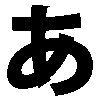

In [1]:
from skimage import io
from IPython.display import display

def Show(a):
    """
    2次元array aを画像として表示する。
    """
    from PIL import Image # 画像操作ライブラリ
    img = Image.fromarray(a)
    display(img)


A = io.imread('https://github.com/vitroid/PythonTutorials/blob/master/2%20Advanced/%E3%81%82.png?raw=true')
print(type(A))

# 画像が、行列であることを確認する。
print(A.shape)
Show(A)

In [ ]:
A

1. 色を反転する。
2. 左右を反転する。
3. 上下を反転する。
4. 対角線に関して反転する。(右上と左下がいれかわる)
5. 時計回りに90度回転する。
6. 横に40ピクセルずらす。(少し難しい)
7. 背景(白)をグレーにする。(fancy indexを使う)
8. 背景に模様を入れる(例えば縦線とか)
9. その他、自分の好みでエフェクトを加える。

1. reverse color 
2. reverse left and right
3. reverse top/bottom
4. Invert with respect to the diagonal (top right and bottom left are swapped). 
5. Rotate 90 degrees clockwise. 
6. Shift 40 pixels horizontally. (a little difficult) 
7. change the background (white) to gray (use fancy index)
8. Add a pattern to the background (e.g., vertical lines). 
9. Add other effects as you like.

In [ ]:
# Sample of 1.
inv = 255 - A
Show(inv)

In [ ]:
# Sample of 2.
B = A[:, ::-1]
Show(B)